 # Tests on PDA

In [1]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



In [2]:
# Example PDA that recognizes balanced parentheses

P1bp  = { "Q"     : {"s0", "s1", "s2"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")",'z'},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   }  # push nothing
                     },
           "q0"    : "s0",
           "z0"    : 'z',
           "F"     : {"s2"}
         }
chk_consistent_pda(P1bp)

In [3]:
# A variant of P1bp with some redundant transitions added (to take the PDA out of a 
P2bp    = { "Q"     : {"s0", "s1", "s2"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")","z"},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   },  # push nothing
                       ('s2','','')   : { ('s2','')   }
                     },
           "q0"    : "s0",
           "z0"    : 'z',
           "F"     : {"s2"}
         }

chk_consistent_pda(P2bp)

In [4]:
# A variant of P2bp with some redundant transitions added (to take the PDA out of a 
P3bp    = { "Q"     : {"s0", "s1", "s2","s3"},
           "Sigma" : {'(',')'},
           "Gamma" : {"(",")","z"},
           "Delta" : { ('s0','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','z') : { ('s1','(z') }, # push z; push (
                       ('s1','(','(') : { ('s1','((') }, # push (; push (
                       ('s1','(',')') : { ('s1','()') }, # push ); push (
                       ('s1',')','(') : { ('s1','')   }, # push nothing
                       ('s1','','z')  : { ('s2','')   },  # push nothing
                       ('s2','','')   : { ('s3','')   } # run away to s3
                     },    # still it matters that a fleeting glimpse of
           "q0"    : "s0", # 's2' has been had, with input consumed!
           "z0"    : 'z',  # That is enough for acceptance. Tsk, tsk!
           "F"     : {"s2"}
         }

chk_consistent_pda(P3bp) 

In [5]:
Pev = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1','Z'},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')} },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }

chk_consistent_pda(Pev)

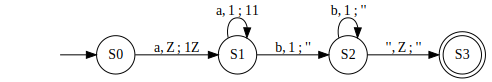

In [6]:
dotObj_pda(Pev)

In [7]:
list(P2bp["Delta"].items())

[(('s0', '(', 'z'), {('s1', '(z')}),
 (('s1', '(', 'z'), {('s1', '(z')}),
 (('s1', '(', '('), {('s1', '((')}),
 (('s1', '(', ')'), {('s1', '()')}),
 (('s1', ')', '('), {('s1', '')}),
 (('s1', '', 'z'), {('s2', '')}),
 (('s2', '', ''), {('s2', '')})]

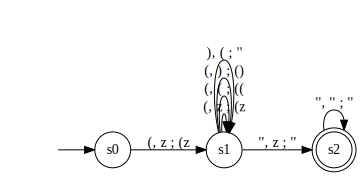

In [8]:
dotObj_pda(P2bp)

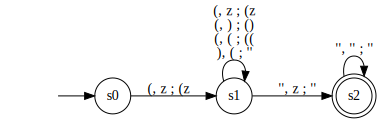

In [9]:
dotObj_pda(P2bp, FuseEdges=True)

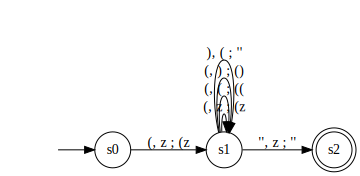

In [10]:
dotObj_pda(P1bp)

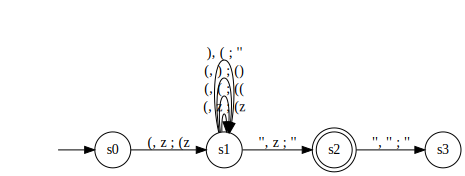

In [11]:
dotObj_pda(P3bp)

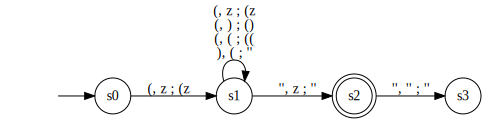

In [12]:
dotObj_pda(P3bp, True)

# Routines to run PDA 

We now devise a routine to run a PDA according to either the "accept by final state" criterion or "accept by empty stack" criterion. We call these "ACCEPT_F" and "ACCEPT_S" with the default being ACCEPT_F.  The main difference is that the "final" configurations are collected differently.

In [13]:
test = {"Sigma" : {'0','1'},
        "Q"     : {'q1','q2','q3','q4','q33','q44','q22'},
        "Gamma" : {'0','1','$'},
        "Delta" : {('q1','',''): {('q2','$')},
                   
                   ('q2','0',''): {('q2','0')},  
                   ('q2','','0'): {('q22','0')}, 
                   
                   ('q2','1',''): {('q2','1')},
                   ('q2','','1'): {('q33','1')},
                   ('q2','1','1'): {('q44','1')},
                   ('q2','',''): {('q3','')}, 
                   
                   ('q3','0','0'): {('q3','')},
                   ('q3','1','1'): {('q3','')},
                   ('q3','','$') : {('q4','')}
                  },
        "z0"    : "$",
        "q0"    : "q1",
        "F"     : {'q1','q4'} }
chk_consistent_pda(test)

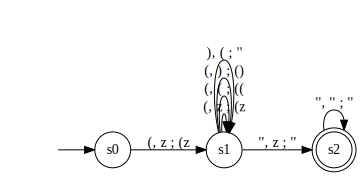

In [14]:
dotObj_pda(P2bp)

In [15]:
explore_pda("()", P2bp)

String () accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('s2', '', '')
Reached as follows:
->  ('s0', '()', 'z')
->  ('s1', ')', '(z')
->  ('s1', '', 'z')
->  ('s2', '', '') .
Final state  ('s2', '', '')
Reached as follows:
->  ('s0', '()', 'z')
->  ('s1', ')', '(z')
->  ('s1', '', 'z')
->  ('s2', '', '')
->  ('s2', '', '') .


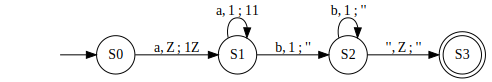

In [16]:
dotObj_pda(Pev)

In [17]:
explore_pda("ab", Pev)

String ab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'ab', 'Z')
->  ('S1', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [18]:
Pev1 = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }


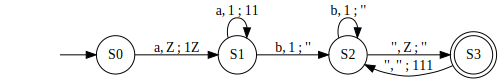

In [19]:
dotObj_pda(Pev1)

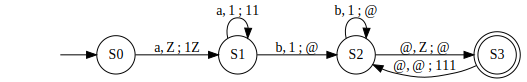

In [20]:
dotObj_pda(Pev1, visible_eps=True)

In [21]:
Pev1 = { "Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : { "S3" } }
chk_consistent_pda(Pev1)

In [22]:
explore_pda("aabb", Pev1)

String aabb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [23]:
Pev2 = {"Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : set({  }) }
chk_consistent_pda(Pev2)

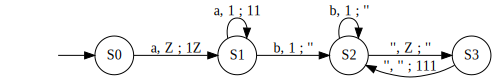

In [24]:
dotObj_pda(Pev2)

In [25]:
# Acceptance by final state is impossible because there are no final states
explore_pda("aabb", Pev2)

String aabb rejected by your PDA :-(
Visited states are:
{('S2', '', 'Z'), ('S1', 'abb', '1Z'), ('S3', '', ''), ('S2', 'b', '1Z'), ('S0', 'aabb', 'Z'), ('S1', 'bb', '11Z'), ('S2', '', '111')}


In [26]:
# Acceptance by empty stack is possible, as in S3
# the input is fully consumed and the stack is empty
explore_pda("aabb", Pev2, "ACCEPT_S")

String aabb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [27]:
Pev3 = {"Sigma" : {'a','b'},
        "Q"     : {"S0", "S1", "S2","S3"},
        "Gamma" : {'a','b','1',"Z"},
        "Delta" : {('S0','a','Z'): {('S1','1Z')},
                   ('S1','a','1'): {('S1','11')},
                   ('S1','b','1'): {('S2','')},
                   ('S2','b','1'): {('S2','')},
                   ('S2','','Z') : {('S3','')},
                   ('S3','', '') : {('S2', '111')}
                  },
        "q0"    : "S0",
        "z0"    : "Z",
        "F"     : {"S2", "S3"} }
chk_consistent_pda(Pev3)

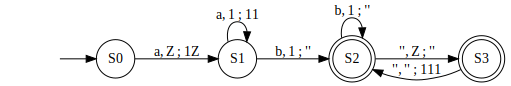

In [28]:
dotObj_pda(Pev3)

In [29]:
# Acceptance at S2, but also continuing on, at S3 and back at S2 also
explore_pda("aabb", Pev3)

String aabb accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('S2', '', 'Z')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z') .
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .
Final state  ('S2', '', '111')
Reached as follows:
->  ('S0', 'aabb', 'Z')
->  ('S1', 'abb', '1Z')
->  ('S1', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '')
->  ('S2', '', '111') .


In [30]:
explore_pda("aaabbb", Pev3)

String aaabbb accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('S2', '', 'Z')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z') .
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .
Final state  ('S2', '', '111')
Reached as follows:
->  ('S0', 'aaabbb', 'Z')
->  ('S1', 'aabbb', '1Z')
->  ('S1', 'abbb', '11Z')
->  ('S1', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '')
->  ('S2', '', '111') .


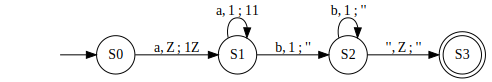

In [31]:
dotObj_pda(Pev)

In [32]:
# Rejection because of mismatched lengths of a's and b's
explore_pda("aaaabbb", Pev)

String aaaabbb rejected by your PDA :-(
Visited states are:
{('S1', 'aaabbb', '1Z'), ('S1', 'bbb', '1111Z'), ('S0', 'aaaabbb', 'Z'), ('S1', 'abbb', '111Z'), ('S2', 'b', '11Z'), ('S2', 'bb', '111Z'), ('S1', 'aabbb', '11Z'), ('S2', '', '1Z')}


In [33]:
explore_pda("aaaabbbb", Pev1)

String aaaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('S3', '', '')
Reached as follows:
->  ('S0', 'aaaabbbb', 'Z')
->  ('S1', 'aaabbbb', '1Z')
->  ('S1', 'aabbbb', '11Z')
->  ('S1', 'abbbb', '111Z')
->  ('S1', 'bbbb', '1111Z')
->  ('S2', 'bbb', '111Z')
->  ('S2', 'bb', '11Z')
->  ('S2', 'b', '1Z')
->  ('S2', '', 'Z')
->  ('S3', '', '') .


In [34]:
explore_pda("aaaabbbb", Pev2)

String aaaabbbb rejected by your PDA :-(
Visited states are:
{('S1', 'aabbbb', '11Z'), ('S0', 'aaaabbbb', 'Z'), ('S1', 'aaabbbb', '1Z'), ('S2', '', '111'), ('S2', '', 'Z'), ('S3', '', ''), ('S2', 'b', '1Z'), ('S1', 'abbbb', '111Z'), ('S2', 'bbb', '111Z'), ('S2', 'bb', '11Z'), ('S1', 'bbbb', '1111Z')}


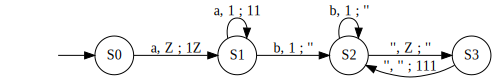

In [35]:
dotObj_pda(Pev2)

In [36]:
F27sip = {"Sigma" : {'a','b','c'},
        "Q"     : {"q1","q2","q3","q4","q5","q6","q7"},
        "Gamma" : {'a','b','c','$'},
        "Delta" : {('q1','','')  : { ('q2','$')},
                   
                   ('q2','a',''): { ('q2','a') },
                   ('q2','',''): { ('q3',''), ('q5','') },
                   
                   ('q3','b','a'): { ('q3','') },
                   ('q3','','$'): { ('q4','') },
                   
                   ('q4','c',''): { ('q4','') },
                   
                   ('q5','b',''): { ('q5','') },
                   ('q5','',''): { ('q6','') },
                   
                   ('q6','c','a'): { ('q6','') },
                   ('q6','','$'): { ('q7','') }
                  },
        "q0"    : "q1",
        "z0"    : "$",
        "F"     : {'q4','q7'} }
chk_consistent_pda(F27sip)

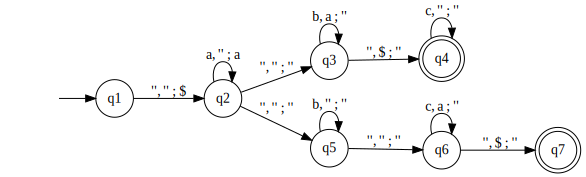

In [37]:
dotObj_pda(F27sip)

In [38]:
wwr = {"Sigma" : {'0','1'},
        "Q"     : {'q1','q2','q3','q4'},
        "Gamma" : {'0','1','$'},
        "Delta" : {('q1','',''): {('q2','$')},
                   ('q2','0',''): {('q2','0')},  
                   ('q2','1',''): {('q2','1')}, 
                   ('q2','',''): {('q3','')}, 
                   ('q3','0','0'): {('q3','')},
                   ('q3','1','1'): {('q3','')},
                   ('q3','','$') : {('q4','')}
                  },
        "q0"    : "q1",
        "z0"    : "$",
        "F"     : {'q1','q4'} }
chk_consistent_pda(wwr)

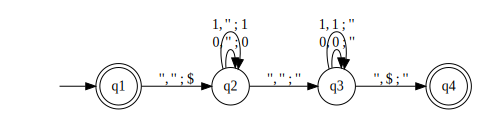

In [39]:
dotObj_pda(wwr)

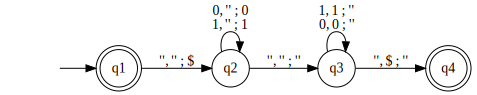

In [40]:
dotObj_pda(wwr, FuseEdges=True)

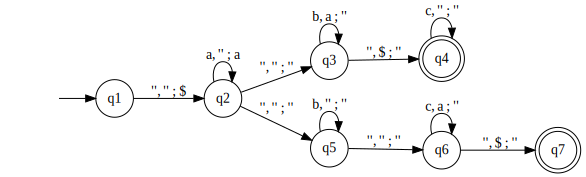

In [41]:
dotObj_pda(F27sip)

In [42]:
explore_pda("aabcc",F27sip)

String aabcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aabcc', '$')
->  ('q2', 'aabcc', '$$')
->  ('q2', 'abcc', 'a$$')
->  ('q2', 'bcc', 'aa$$')
->  ('q5', 'bcc', 'aa$$')
->  ('q5', 'cc', 'aa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


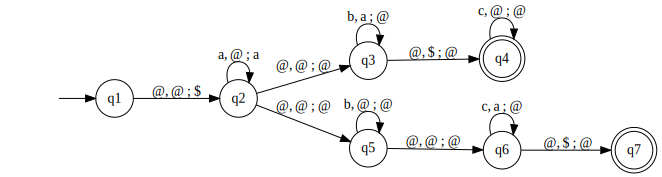

In [43]:
dotObj_pda(F27sip, visible_eps=True)

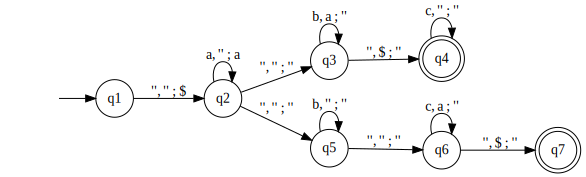

In [44]:
dotObj_pda(F27sip, visible_eps=False)

In [45]:
onestpda = {"Sigma" : {'a','b','c'},
        "Q"     : { "q7"},
        "Gamma" : { 'a','b','c','$'},
        "Delta" : { 
                   ('q7','',''): {('q7','aa')}
                  },
        "q0"    : "q7",
        "z0"    : "$",
        "F"     : set({ }) }
chk_consistent_pda(onestpda)

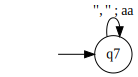

In [46]:
dotObj_pda(onestpda)

In [47]:
explore_pda("a",onestpda)

String a rejected by your PDA :-(
Visited states are:
{('q7', 'a', '$'), ('q7', 'a', 'aa$'), ('q7', 'a', 'aaaa$'), ('q7', 'a', 'aaaaaaaa$'), ('q7', 'a', 'aaaaaa$')}


In [48]:
# This accepts nondeterministically by matching a's and b's
# as well as a's and c's
explore_pda("aabbcc",F27sip)

String aabbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('q4', '', '$')
Reached as follows:
->  ('q1', 'aabbcc', '$')
->  ('q2', 'aabbcc', '$$')
->  ('q2', 'abbcc', 'a$$')
->  ('q2', 'bbcc', 'aa$$')
->  ('q3', 'bbcc', 'aa$$')
->  ('q3', 'bcc', 'a$$')
->  ('q3', 'cc', '$$')
->  ('q4', 'cc', '$')
->  ('q4', 'c', '$')
->  ('q4', '', '$') .
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aabbcc', '$')
->  ('q2', 'aabbcc', '$$')
->  ('q2', 'abbcc', 'a$$')
->  ('q2', 'bbcc', 'aa$$')
->  ('q5', 'bbcc', 'aa$$')
->  ('q5', 'bcc', 'aa$$')
->  ('q5', 'cc', 'aa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


In [49]:
explore_pda("aaabbbccc",F27sip)

String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('q4', '', '$')
Reached as follows:
->  ('q1', 'aaabbbccc', '$')
->  ('q2', 'aaabbbccc', '$$')
->  ('q2', 'aabbbccc', 'a$$')
->  ('q2', 'abbbccc', 'aa$$')
->  ('q2', 'bbbccc', 'aaa$$')
->  ('q3', 'bbbccc', 'aaa$$')
->  ('q3', 'bbccc', 'aa$$')
->  ('q3', 'bccc', 'a$$')
->  ('q3', 'ccc', '$$')
->  ('q4', 'ccc', '$')
->  ('q4', 'cc', '$')
->  ('q4', 'c', '$')
->  ('q4', '', '$') .
Final state  ('q7', '', '$')
Reached as follows:
->  ('q1', 'aaabbbccc', '$')
->  ('q2', 'aaabbbccc', '$$')
->  ('q2', 'aabbbccc', 'a$$')
->  ('q2', 'abbbccc', 'aa$$')
->  ('q2', 'bbbccc', 'aaa$$')
->  ('q5', 'bbbccc', 'aaa$$')
->  ('q5', 'bbccc', 'aaa$$')
->  ('q5', 'bccc', 'aaa$$')
->  ('q5', 'ccc', 'aaa$$')
->  ('q6', 'ccc', 'aaa$$')
->  ('q6', 'cc', 'aa$$')
->  ('q6', 'c', 'a$$')
->  ('q6', '', '$$')
->  ('q7', '', '$') .


In [50]:
onestpda1 = {"Sigma" : {'a','b','c'},
        "Q"     : { "q7"},
        "Gamma" : { 'a','b','c','$'},
        "Delta" : { 
                   ('q7','',''): {('q7','aa')}
                  },
        "q0"    : "q7",
        "z0"    : "$",
        "F"     : set({ }) }
chk_consistent_pda(onestpda1)

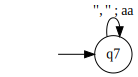

In [51]:
dotObj_pda(onestpda1)

In [52]:
explore_pda("",onestpda1, "ACCEPT_S")

String  rejected by your PDA :-(
Visited states are:
{('q7', '', 'aaaa$'), ('q7', '', 'aa$'), ('q7', '', '$'), ('q7', '', 'aaaaaa$'), ('q7', '', 'aaaaaaaa$')}


In [53]:
explore_pda("",onestpda1, "ACCEPT_S", chatty=True)

s_terminal_id =  {('q7', '', 'aaaaaaaaaa$')}
l_final_id_path =  []
s_visited_id =  {('q7', '', 'aaaa$'), ('q7', '', 'aa$'), ('q7', '', '$'), ('q7', '', 'aaaaaa$'), ('q7', '', 'aaaaaaaa$')}
String  rejected by your PDA :-(
Visited states are:
{('q7', '', 'aaaa$'), ('q7', '', 'aa$'), ('q7', '', '$'), ('q7', '', 'aaaaaa$'), ('q7', '', 'aaaaaaaa$')}


In [54]:
explore_pda("",onestpda1, "ACCEPT_F")

String  rejected by your PDA :-(
Visited states are:
{('q7', '', 'aaaa$'), ('q7', '', 'aa$'), ('q7', '', '$'), ('q7', '', 'aaaaaa$'), ('q7', '', 'aaaaaaaa$')}


In [55]:
run_pda("",onestpda1, "ACCEPT_S", chatty=False)

({('q7', '', 'aaaaaaaaaa$')},
 [],
 {('q7', '', '$'),
  ('q7', '', 'aa$'),
  ('q7', '', 'aaaa$'),
  ('q7', '', 'aaaaaa$'),
  ('q7', '', 'aaaaaaaa$')})

In [56]:
run_pda("",onestpda1, "ACCEPT_S", chatty=True)

s_terminal_id =  {('q7', '', 'aaaaaaaaaa$')}
l_final_id_path =  []
s_visited_id =  {('q7', '', 'aaaa$'), ('q7', '', 'aa$'), ('q7', '', '$'), ('q7', '', 'aaaaaa$'), ('q7', '', 'aaaaaaaa$')}


({('q7', '', 'aaaaaaaaaa$')},
 [],
 {('q7', '', '$'),
  ('q7', '', 'aa$'),
  ('q7', '', 'aaaa$'),
  ('q7', '', 'aaaaaa$'),
  ('q7', '', 'aaaaaaaa$')})

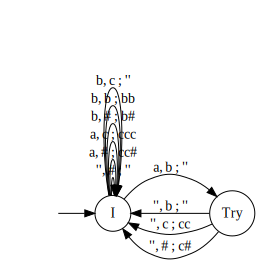

In [57]:
a1b2_s = md2mc(src="File", fname="machines/pdafiles/a1b2_accept_s.pda")
dotObj_pda(a1b2_s) 

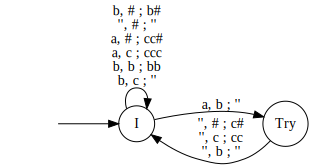

In [58]:
dotObj_pda(a1b2_s, FuseEdges=True) 

In [59]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=10, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [60]:
explore_pda("abb", a1b2_s, acceptance='ACCEPT_S')

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'abb', '#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [61]:
explore_pda("bab", a1b2_s, acceptance='ACCEPT_S')

String bab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bab', '#')
->  ('I', 'ab', 'b#')
->  ('Try', 'b', '#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [62]:
explore_pda("bba", a1b2_s, acceptance='ACCEPT_S')

String bba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('I', '', '') .


In [63]:
explore_pda("bbaabbbabaabbabbbb", a1b2_s, acceptance='ACCEPT_S')

String bbaabbbabaabbabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bbaabbbabaabbabbbb', '#')
->  ('I', 'baabbbabaabbabbbb', 'b#')
->  ('I', 'aabbbabaabbabbbb', 'bb#')
->  ('Try', 'abbbabaabbabbbb', 'b#')
->  ('I', 'abbbabaabbabbbb', '#')
->  ('I', 'bbbabaabbabbbb', 'cc#')
->  ('I', 'bbabaabbabbbb', 'c#')
->  ('I', 'babaabbabbbb', '#')
->  ('I', 'abaabbabbbb', 'b#')
->  ('Try', 'baabbabbbb', '#')
->  ('I', 'baabbabbbb', 'c#')
->  ('I', 'aabbabbbb', '#')
->  ('I', 'abbabbbb', 'cc#')
->  ('I', 'bbabbbb', 'cccc#')
->  ('I', 'babbbb', 'ccc#')
->  ('I', 'abbbb', 'cc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [64]:
explore_pda("babaababbbaabbbbbb", a1b2_s, acceptance='ACCEPT_S')

String babaababbbaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'babaababbbaabbbbbb', '#')
->  ('I', 'abaababbbaabbbbbb', 'b#')
->  ('Try', 'baababbbaabbbbbb', '#')
->  ('I', 'baababbbaabbbbbb', 'c#')
->  ('I', 'aababbbaabbbbbb', '#')
->  ('I', 'ababbbaabbbbbb', 'cc#')
->  ('I', 'babbbaabbbbbb', 'cccc#')
->  ('I', 'abbbaabbbbbb', 'ccc#')
->  ('I', 'bbbaabbbbbb', 'ccccc#')
->  ('I', 'bbaabbbbbb', 'cccc#')
->  ('I', 'baabbbbbb', 'ccc#')
->  ('I', 'aabbbbbb', 'cc#')
->  ('I', 'abbbbbb', 'cccc#')
->  ('I', 'bbbbbb', 'cccccc#')
->  ('I', 'bbbbb', 'ccccc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [65]:
explore_pda("abbaababbbabbbbbba", a1b2_s, acceptance='ACCEPT_S')

String abbaababbbabbbbbba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'abbaababbbabbbbbba', '#')
->  ('I', 'bbaababbbabbbbbba', 'cc#')
->  ('I', 'baababbbabbbbbba', 'c#')
->  ('I', 'aababbbabbbbbba', '#')
->  ('I', 'ababbbabbbbbba', 'cc#')
->  ('I', 'babbbabbbbbba', 'cccc#')
->  ('I', 'abbbabbbbbba', 'ccc#')
->  ('I', 'bbbabbbbbba', 'ccccc#')
->  ('I', 'bbabbbbbba', 'cccc#')
->  ('I', 'babbbbbba', 'ccc#')
->  ('I', 'abbbbbba', 'cc#')
->  ('I', 'bbbbbba', 'cccc#')
->  ('I', 'bbbbba', 'ccc#')
->  ('I', 'bbbba', 'cc#')
->  ('I', 'bbba', 'c#')
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('I', '', '') .


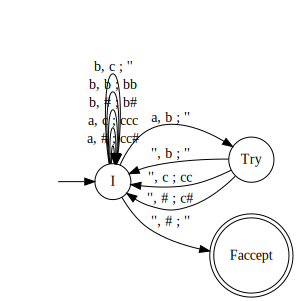

In [66]:
a1b2_f = md2mc(src="File", fname="machines/pdafiles/a1b2_accept_f.pda")
dotObj_pda(a1b2_f) 

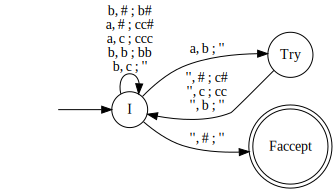

In [67]:
dotObj_pda(a1b2_f, FuseEdges=True)

In [68]:
explore_pda("abbaababbbabbbbbba", a1b2_f) # Default is accept_f

String abbaababbbabbbbbba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Faccept', '', '')
Reached as follows:
->  ('I', 'abbaababbbabbbbbba', '#')
->  ('I', 'bbaababbbabbbbbba', 'cc#')
->  ('I', 'baababbbabbbbbba', 'c#')
->  ('I', 'aababbbabbbbbba', '#')
->  ('I', 'ababbbabbbbbba', 'cc#')
->  ('I', 'babbbabbbbbba', 'cccc#')
->  ('I', 'abbbabbbbbba', 'ccc#')
->  ('I', 'bbbabbbbbba', 'ccccc#')
->  ('I', 'bbabbbbbba', 'cccc#')
->  ('I', 'babbbbbba', 'ccc#')
->  ('I', 'abbbbbba', 'cc#')
->  ('I', 'bbbbbba', 'cccc#')
->  ('I', 'bbbbba', 'ccc#')
->  ('I', 'bbbba', 'cc#')
->  ('I', 'bbba', 'c#')
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('Faccept', '', '') .


In [69]:
explore_pda("babaababbbaabbbbbb", a1b2_f, acceptance='ACCEPT_F') # default acceptance

String babaababbbaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Faccept', '', '')
Reached as follows:
->  ('I', 'babaababbbaabbbbbb', '#')
->  ('I', 'abaababbbaabbbbbb', 'b#')
->  ('Try', 'baababbbaabbbbbb', '#')
->  ('I', 'baababbbaabbbbbb', 'c#')
->  ('I', 'aababbbaabbbbbb', '#')
->  ('I', 'ababbbaabbbbbb', 'cc#')
->  ('I', 'babbbaabbbbbb', 'cccc#')
->  ('I', 'abbbaabbbbbb', 'ccc#')
->  ('I', 'bbbaabbbbbb', 'ccccc#')
->  ('I', 'bbaabbbbbb', 'cccc#')
->  ('I', 'baabbbbbb', 'ccc#')
->  ('I', 'aabbbbbb', 'cc#')
->  ('I', 'abbbbbb', 'cccc#')
->  ('I', 'bbbbbb', 'cccccc#')
->  ('I', 'bbbbb', 'ccccc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('Faccept', '', '') .


In [70]:
explore_pda("bbaabbbabaabbabbbb", a1b2_f, STKMAX=2)

String bbaabbbabaabbabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Faccept', '', '')
Reached as follows:
->  ('I', 'bbaabbbabaabbabbbb', '#')
->  ('I', 'baabbbabaabbabbbb', 'b#')
->  ('I', 'aabbbabaabbabbbb', 'bb#')
->  ('Try', 'abbbabaabbabbbb', 'b#')
->  ('I', 'abbbabaabbabbbb', '#')
->  ('I', 'bbbabaabbabbbb', 'cc#')
->  ('I', 'bbabaabbabbbb', 'c#')
->  ('I', 'babaabbabbbb', '#')
->  ('I', 'abaabbabbbb', 'b#')
->  ('Try', 'baabbabbbb', '#')
->  ('I', 'baabbabbbb', 'c#')
->  ('I', 'aabbabbbb', '#')
->  ('I', 'abbabbbb', 'cc#')
->  ('I', 'bbabbbb', 'cccc#')
->  ('I', 'babbbb', 'ccc#')
->  ('I', 'abbbb', 'cc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('Faccept', '', '') .


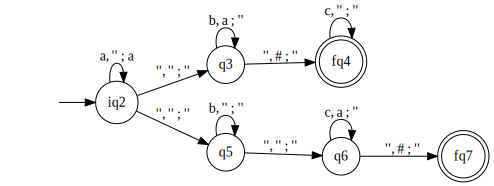

In [71]:
f27sip = md2mc('''
PDA 
!!---------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's 
!! in the middle. Thus, the language is
!! a^m b^m c^n or a^m b^n c^m
!!---------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq2    : a  , ''  ; a     -> iq2      !!  stack a's
iq2    : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)
			     
q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , #   ; ''    -> fq4      !!  hope for acceptance when # surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
			              !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , #   ; ''    -> fq7      !!  when # surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
			                          !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
''')
DOf27sip = dotObj_pda(f27sip, FuseEdges=True)
DOf27sip

In [72]:
DOf27sip.source

'// PO_St27\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tq3 [label=q3 peripheries=1 shape=circle]\n\t\tiq2 [label=iq2 peripheries=1 shape=circle]\n\t\tq5 [label=q5 peripheries=1 shape=circle]\n\t\tq6 [label=q6 peripheries=1 shape=circle]\n\t\tfq7 [label=fq7 peripheries=2 shape=circle]\n\t\tfq4 [label=fq4 peripheries=2 shape=circle]\n\t\t\tEMPTY -> iq2\n\t\t\tiq2 -> iq2 [label="a, \'\' ; a"]\n\t\t\tiq2 -> q5 [label="\'\', \'\' ; \'\'"]\n\t\t\tiq2 -> q3 [label="\'\', \'\' ; \'\'"]\n\t\t\tq3 -> q3 [label="b, a ; \'\'"]\n\t\t\tq3 -> fq4 [label="\'\', # ; \'\'"]\n\t\t\tfq4 -> fq4 [label="c, \'\' ; \'\'"]\n\t\t\tq5 -> q5 [label="b, \'\' ; \'\'"]\n\t\t\tq5 -> q6 [label="\'\', \'\' ; \'\'"]\n\t\t\tq6 -> q6 [label="c, a ; \'\'"]\n\t\t\tq6 -> fq7 [label="\'\', # ; \'\'"]\n}'

In [73]:
explore_pda("aaabbbccc", f27sip)

String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('fq4', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q3', 'bbbccc', 'aaa#')
->  ('q3', 'bbccc', 'aa#')
->  ('q3', 'bccc', 'a#')
->  ('q3', 'ccc', '#')
->  ('fq4', 'ccc', '')
->  ('fq4', 'cc', '')
->  ('fq4', 'c', '')
->  ('fq4', '', '') .
Final state  ('fq7', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q5', 'bbbccc', 'aaa#')
->  ('q5', 'bbccc', 'aaa#')
->  ('q5', 'bccc', 'aaa#')
->  ('q5', 'ccc', 'aaa#')
->  ('q6', 'ccc', 'aaa#')
->  ('q6', 'cc', 'aa#')
->  ('q6', 'c', 'a#')
->  ('q6', '', '#')
->  ('fq7', '', '') .
